## Python implementation of Softmax Regression from scratch for MNIST dataset

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import relevant components

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from keras.datasets import mnist
np.random.seed(100)

Using TensorFlow backend.


### Data Preparation

#### 1. Data Dimensions
MNIST database consists of 60,000 training and 10,000 test images. Each image is a 28x28 greyscale image having pixel values in range 0-255. Each image has its corresponding label, a number in range 0-9, which represents the image.

In [19]:
training_samples = 60000
test_samples = 10000
input_dim = 784
num_output_classes = 10

#### 2. Download Data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test are training and test set images respectively. y_train and y_test are training and test set labels repectively.
Once data has been downloaded, it could be saved to disk and then loaded from disk itself for any subsequent use.

In [5]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

#### 3. Reshape and Normalize data
Reshape 28X28 resolution images into vectors of size 784. Normalize data by dividing pixel values by 255. 

In [6]:
X_train = X_train.reshape(training_samples, input_dim)
X_train = X_train.astype('float32') #As default data type is int, change it to float to get decimals after division
X_train /= 255
X_train = np.append(X_train,np.ones((training_samples,1)), axis = 1) #Add a column of all 1's to account for bias unit

X_test = X_test.reshape(test_samples, input_dim)
X_test = X_test.astype('float32')
X_test /= 255
X_test = np.append(X_test,np.ones((test_samples, 1)), axis = 1)

#### 4. One hot encoding
Convert image labels into one-hot vectors using fancy indexing of numpy.

In [7]:
Y_train = np.zeros((y_train.size, num_output_classes))
Y_train[np.arange(y_train.size),y_train] = 1

Y_test = np.zeros((y_test.size, num_output_classes))
Y_test[np.arange(y_test.size),y_test] = 1

#### 5. Train/Validation split
Split the training data into training & validation sets. Shuffle the training data randomly before splitting to obtain a good validation set.


In [8]:
random_index = np.random.permutation(X_train.shape[0])
X_random, Y_random, y_random = X_train[random_index], Y_train[random_index], y_train[random_index]
X_train, X_validation = X_random[:50000, :], X_random[50000:, :]
Y_train, Y_validation = Y_random[:50000, :], Y_random[50000:, :]
y_train, y_validation = y_random[:50000, ], y_random[50000:, ]

print('No of training samples: ', X_train.shape[0])
print('No of validation samples: ', X_validation.shape[0])
print('No of test samples: ', X_test.shape[0])

No of training samples:  50000
No of validation samples:  10000
No of test samples:  10000


### Helper Functions
Given below are the functions which training and test process use. Dimesions of various variables is as follows.
    
    Input X = matrix(60000, 785)
    Target Y = matrix(60000, 10)
    Weights w = matrix(10, 785)   
    A = matrix(60000,10)
    Error E = matrix(785,10) 

In [9]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape((-1, 1)) # sum horizontally


def error_gradient(X, Y, w):
    A = softmax(np.dot(X, w.T))
    E = np.dot((A-Y).T, X) / X.shape[0]
    return E


def likelihood(X, Y, w):
    A = softmax(np.dot(X, w.T))
    L = np.exp(np.sum(Y* np.log(A))/X.shape[0])
    return L


def accuracy(X, y, w):
    A = softmax(np.dot(X, w.T))
    B = np.argmax(A, axis = 1)
    accuracy = (np.sum(B == y) / X.shape[0]) * 100
    return accuracy


def logistic_regression(X, Y, w, learning_rate, batch_size):
    for j in range(0, X.shape[0], batch_size):
        X_batch = X[j:j + batch_size, :]
        Y_batch = Y[j:j + batch_size, :]
        E = error_gradient(X_batch, Y_batch, w)
        w = w - learning_rate * E
    return w

### Train Model

In [16]:
def train_model(learning_rate = 0.01, batch_size = 128, num_epoch = 15):
    w = np.random.rand(num_output_classes, input_dim + 1)
    metrics = np.zeros((num_epoch, 5))
    for i in range(num_epoch):
        shuffle_index = np.random.permutation(X_train.shape[0])
        X_shuffled, Y_shuffled = X_train[shuffle_index], Y_train[shuffle_index]
        
        # Build model
        w = logistic_regression(X_shuffled, Y_shuffled, w, learning_rate, batch_size)
        
        # Evaluate model
        train_likelihood = likelihood(X_train, Y_train, w)
        train_accuracy = accuracy(X_train, y_train, w)
        val_likelihood = likelihood(X_validation, Y_validation, w)
        val_accuracy = accuracy(X_validation, y_validation, w)

        metrics[i] = [i+1, train_likelihood, train_accuracy, val_likelihood, val_accuracy]

    print("Train Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Test Accuracy:", accuracy(X_test, y_test, w))
    
    #Plot accuracy
    plt.rcParams['figure.figsize'] = [20,20]
    plt.plot(metrics[:, 0], metrics[:, 2])
    plt.plot(metrics[:, 0], metrics[:, 4])
    plt.title("LR:{}, BS:{}".format(learning_rate, batch_size), pad = -20)
    #plt.xlabel('Epochs')
    #plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')

### Main Function
1. Trains and evaluates the model for various combinations of learning rates and batch sizes.
2. Plots training and validation accuracy as a function of epoch.


Learning_rate: 0.001, Batch_size: 1
Train Accuracy: 91.994
Validation Accuracy: 91.05
Test Accuracy: 91.56

Learning_rate: 0.001, Batch_size: 32
Train Accuracy: 81.744
Validation Accuracy: 81.32000000000001
Test Accuracy: 82.43

Learning_rate: 0.001, Batch_size: 128
Train Accuracy: 64.72200000000001
Validation Accuracy: 64.0
Test Accuracy: 65.10000000000001

Learning_rate: 0.001, Batch_size: 1024
Train Accuracy: 15.118
Validation Accuracy: 14.46
Test Accuracy: 15.28

Learning_rate: 0.01, Batch_size: 1
Train Accuracy: 92.854
Validation Accuracy: 91.43
Test Accuracy: 92.24

Learning_rate: 0.01, Batch_size: 32
Train Accuracy: 90.34
Validation Accuracy: 89.49000000000001
Test Accuracy: 90.53999999999999

Learning_rate: 0.01, Batch_size: 128
Train Accuracy: 86.576
Validation Accuracy: 86.00999999999999
Test Accuracy: 87.22999999999999

Learning_rate: 0.01, Batch_size: 1024
Train Accuracy: 66.658
Validation Accuracy: 66.25999999999999
Test Accuracy: 67.55

Learning_rate: 0.05, Batch_size: 1

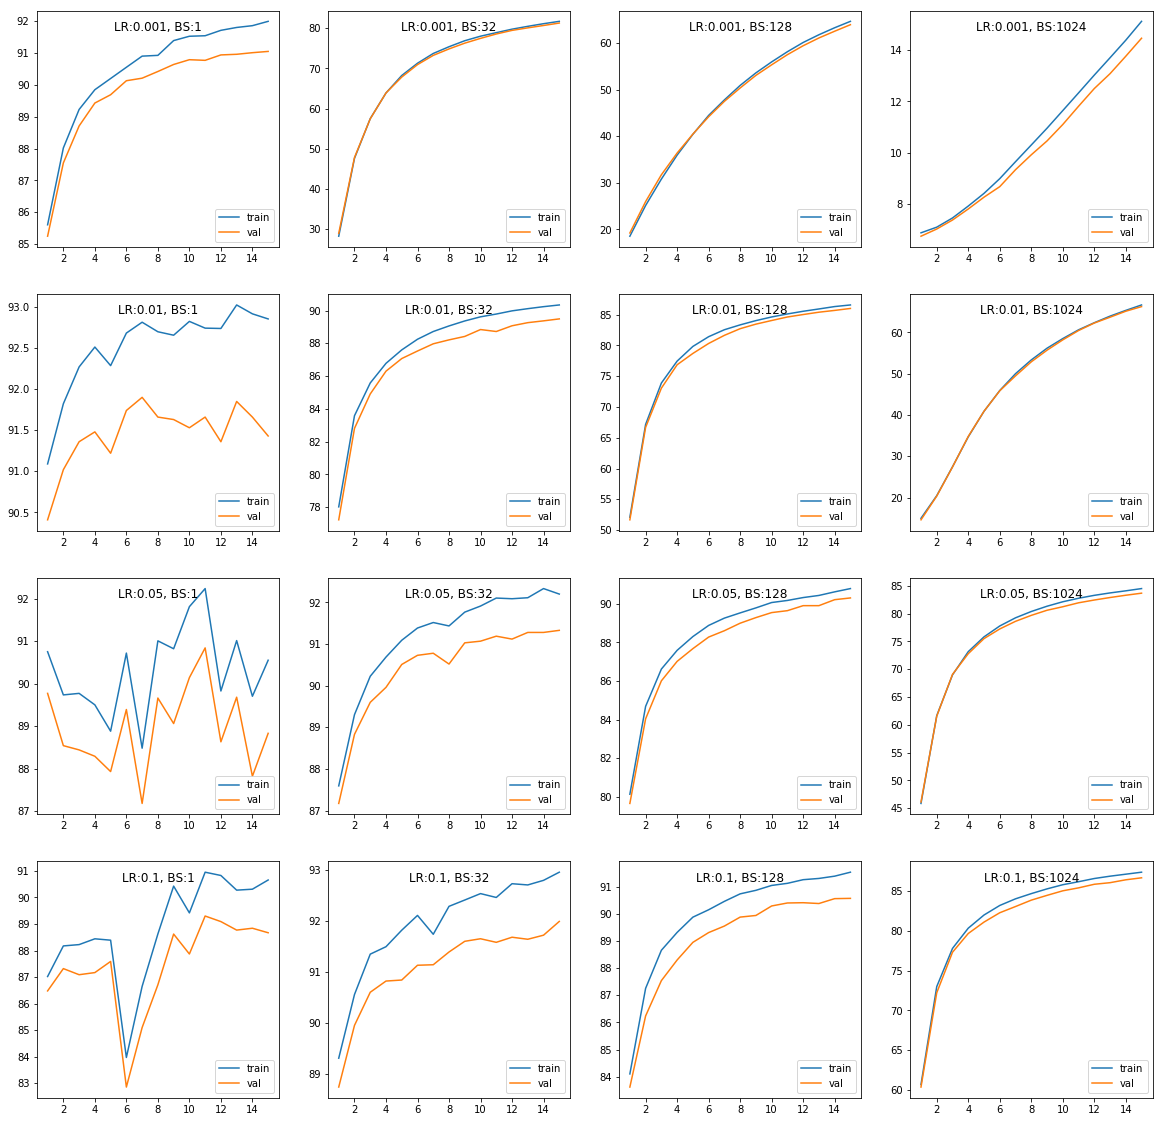

In [21]:
def main():
    learning_rate = [0.001, 0.01, 0.05, 0.1]
    batch_size = [1, 32, 128, 1024]
    grid = list(itertools.product(learning_rate, batch_size))
    for params in grid:
        print("\nLearning_rate: {}, Batch_size: {}".format(params[0], params[1]))
        plt.subplot(4, 4, grid.index(params) + 1)
        train_model(learning_rate=params[0], batch_size=params[1], num_epoch = 15)
    plt.show()

main()

### Influence of learning rate and batch size
#### On validation accuracy
   1. For a given learning rate, validation accuracy saturates faster for small batch sizes. This is because for smaller batch sizes, more updates are made to weights, thus learning process is faster. For larger batch sizes, more training epochs would be needed in order to reach same accuracy level. In other words, for a given learning rate and number of epochs, validation accuracy decreases with increasing batch size.

   2. For a given batch size, validation accuracy saturates faster for large learning rates. This is because larger learning rates result in rapid changes to weights making learning process faster. Smaller learning rates, which make small changes to weights in each update, would need more training epochs in order to reach same accuracy level. In other words, for a given batch size and no of epochs, validation accuracy generally improves with increasing learning rate.

   3. 1 exception to above observations are made. Batch size = 1 does not perform well (except on learning rate = 0.001). Both training and validation accuracy fail to reach reasonable values and are noisy.
       

#### On test accuracy
   1. For a given learning rate, test accuracy improves with decreasing batch size.
   2. For a given batch size, test accuracy generally improves with increasing learning rate. 
   3. Test accuracy is low for above  exception case.
   4. Highest validation accuracy is obtained for learning rate = 0.1 and batch size = 32. Hence test accuracy = 92.12% is best performance for the algorithm.